Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Load the data sets- train and test 
df = pd.read_csv('train_titanic.csv')

In [3]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Print the column names of train data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# -ksv:  handing of the null and the missing vales
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:

x = df.drop(columns=['Survived'])
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
#Print the dimension of train and test data

( (x.shape,y.shape) ), (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(((891, 11), (891,)), ((668, 11), (223, 11), (668,), (223,)))

In [7]:
#Print the number of missing values in each column of train and test data
print("Train follwed by test")
(x_train.isnull().sum(),y_train.isnull().sum() ), (x_test.isnull().sum(),y_test.isnull().sum())


Train follwed by test


((PassengerId      0
  Pclass           0
  Name             0
  Sex              0
  Age            125
  SibSp            0
  Parch            0
  Ticket           0
  Fare             0
  Cabin          514
  Embarked         1
  dtype: int64,
  0),
 (PassengerId      0
  Pclass           0
  Name             0
  Sex              0
  Age             52
  SibSp            0
  Parch            0
  Ticket           0
  Fare             0
  Cabin          173
  Embarked         1
  dtype: int64,
  0))

## Data Visualization

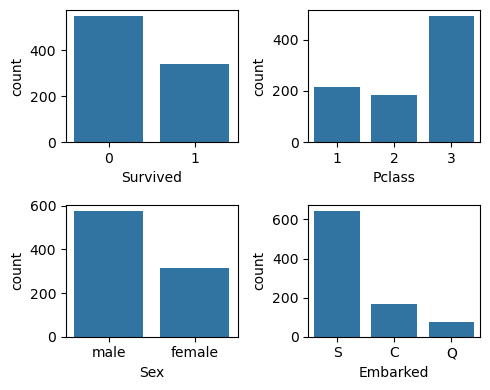

In [8]:
#Barchart of Survived, Pclass, Sex, Embarked

cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

fig, axis = plt.subplots(2,2,figsize=(5,4))
axis = axis.flatten()
for i,col in enumerate(cols):
  cur_ax = axis[i]
  sns.countplot(data = df,x=col,ax=cur_ax)
plt.tight_layout()
plt.show()

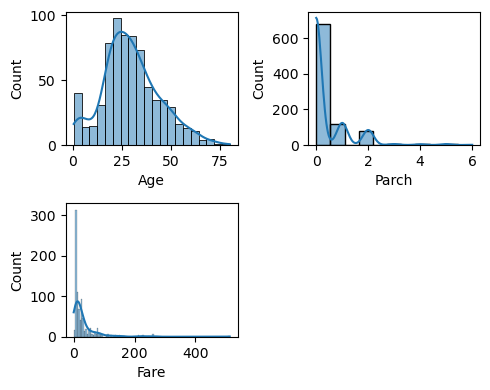

In [9]:
#Histogram of Age, Parch, Fare
import matplotlib.pyplot as plt

cols = ['Age', 'Parch', 'Fare']

fig, axis = plt.subplots(2,2,figsize=(5,4))
axis = axis.flatten()
for i,col in enumerate(cols):
  sns.histplot(data=df,x = col,ax=axis[i],kde=True)

plt.delaxes(axis[3])
plt.tight_layout()
plt.show()


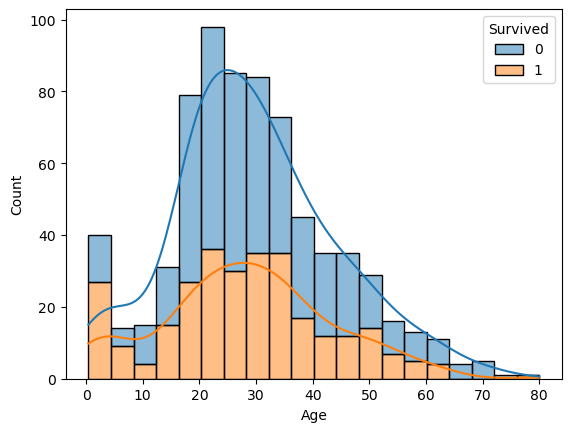

In [10]:
# #Plot histogram of age for survived and did not survived class

sns.histplot(data=df,x = 'Age',hue='Survived',multiple='stack',kde=True)
plt.show()


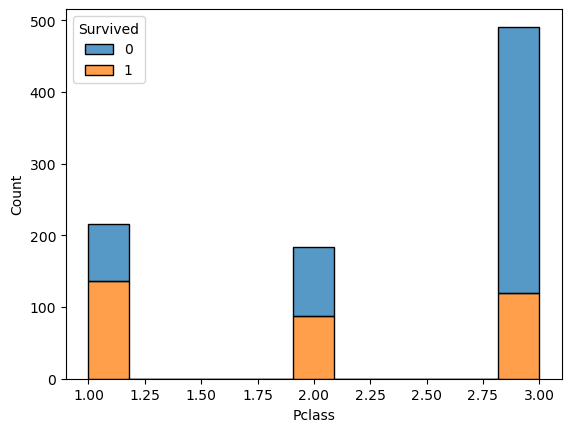

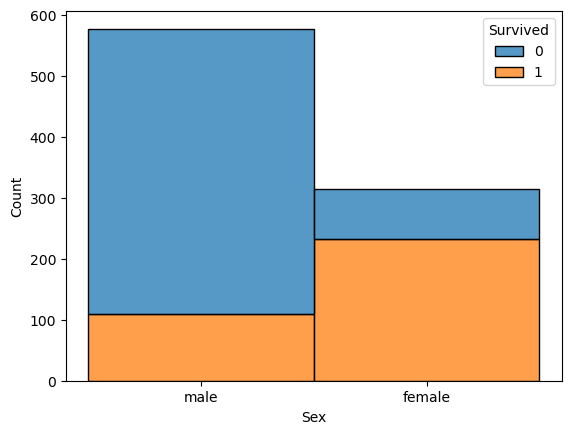

<Figure size 640x480 with 0 Axes>

In [11]:
#Count class and gender wise survival rate - plot with appropriate char
import matplotlib.pyplot as plt
for col in ['Pclass','Sex']:
  sns.histplot(data=df,x=col,hue='Survived',multiple='stack')
  plt.show()
plt.tight_layout()
plt.show()
#Age wise Distribution of Male and Female passengers

<Axes: xlabel='Age', ylabel='Count'>

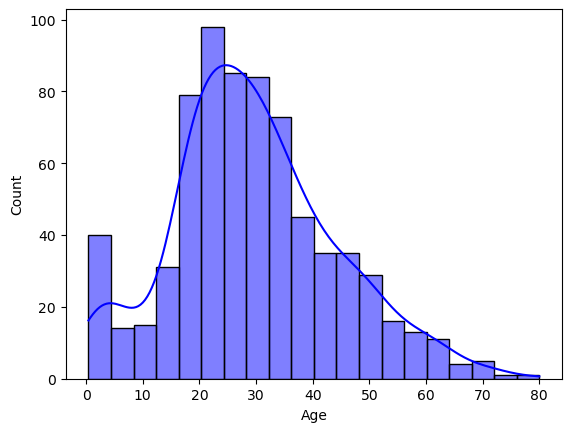

In [12]:
#Histogram of Age of the given data set(sample)

sns.histplot(data=df,x = 'Age',kde=True,color='blue',bins=20)

## Handling Missing Values

In [13]:
#Replace the mising values in Embarked column by 'S'
cols = [col for col in df.columns if col.lower().startswith('s')]

print(df[cols].isnull().sum())


for col in cols:
  if(df[col].dtype == 'object'):
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
  else:
    df[col] = df[col].fillna(df[col].mean())



Survived    0
Sex         0
SibSp       0
dtype: int64


In [14]:
#Impute the missing values in Fare column with median value

df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [15]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

import numpy as np

# Step 1: Get the mean and std of non-null Age values
age_mean = df['Age'].mean()
age_std = df['Age'].std()

# Step 2: Count how many missing Age values exist
n_missing = df['Age'].isnull().sum()

# Step 3: Generate random ages from a normal distribution
random_ages = np.random.normal(loc=age_mean, scale=age_std, size=n_missing)

# Optional: Clip values to keep them within a realistic age range (e.g., 0-80)
random_ages = np.clip(random_ages, 0, 80)

# Step 4: Fill missing values with these generated random ages
df.loc[df['Age'].isnull(), 'Age'] = random_ages



## Feature Engineering - Creating new features

In [16]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
print(df.shape)
df['FamilySize'] = df['SibSp']+df['Parch']+1
print(df.shape)
#FamilySize = Parch + SibSp + 1

(891, 12)
(891, 13)


In [17]:
# Create new feature IsAlone from FamilySize
df['IsAlone'] = df['FamilySize'] == 1
#If FamilySize == 1 then IsAlone = True else IsAlone = False

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [18]:
df['Has_cabin'] = df['Cabin'].notnull()

In [19]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin 
cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df = df.drop(columns=cols)
df.shape

(891, 11)

## Model Building

In [39]:
#Prepare X and y 

x = df.drop(columns=['Survived'])
y = df['Survived']


In [ ]:
# Label encoding of categorical features

from sklearn.preprocessing import LabelEncoder

cols = df.select_dtypes(include=['object']).columns


for col in cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

df.dtypes


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,1,22.000000,1,0,7.2500,2,2,False,False
1,1,1,0,38.000000,1,0,71.2833,0,2,False,True
2,1,3,0,26.000000,0,0,7.9250,2,1,True,False
3,1,1,0,35.000000,1,0,53.1000,2,2,False,True
4,0,3,1,35.000000,0,0,8.0500,2,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,True,False
887,1,1,0,19.000000,0,0,30.0000,2,1,True,True
888,0,3,0,48.184031,1,2,23.4500,2,4,False,False
889,1,1,1,26.000000,0,0,30.0000,0,1,True,True


In [22]:
# concat df_categorical with original df


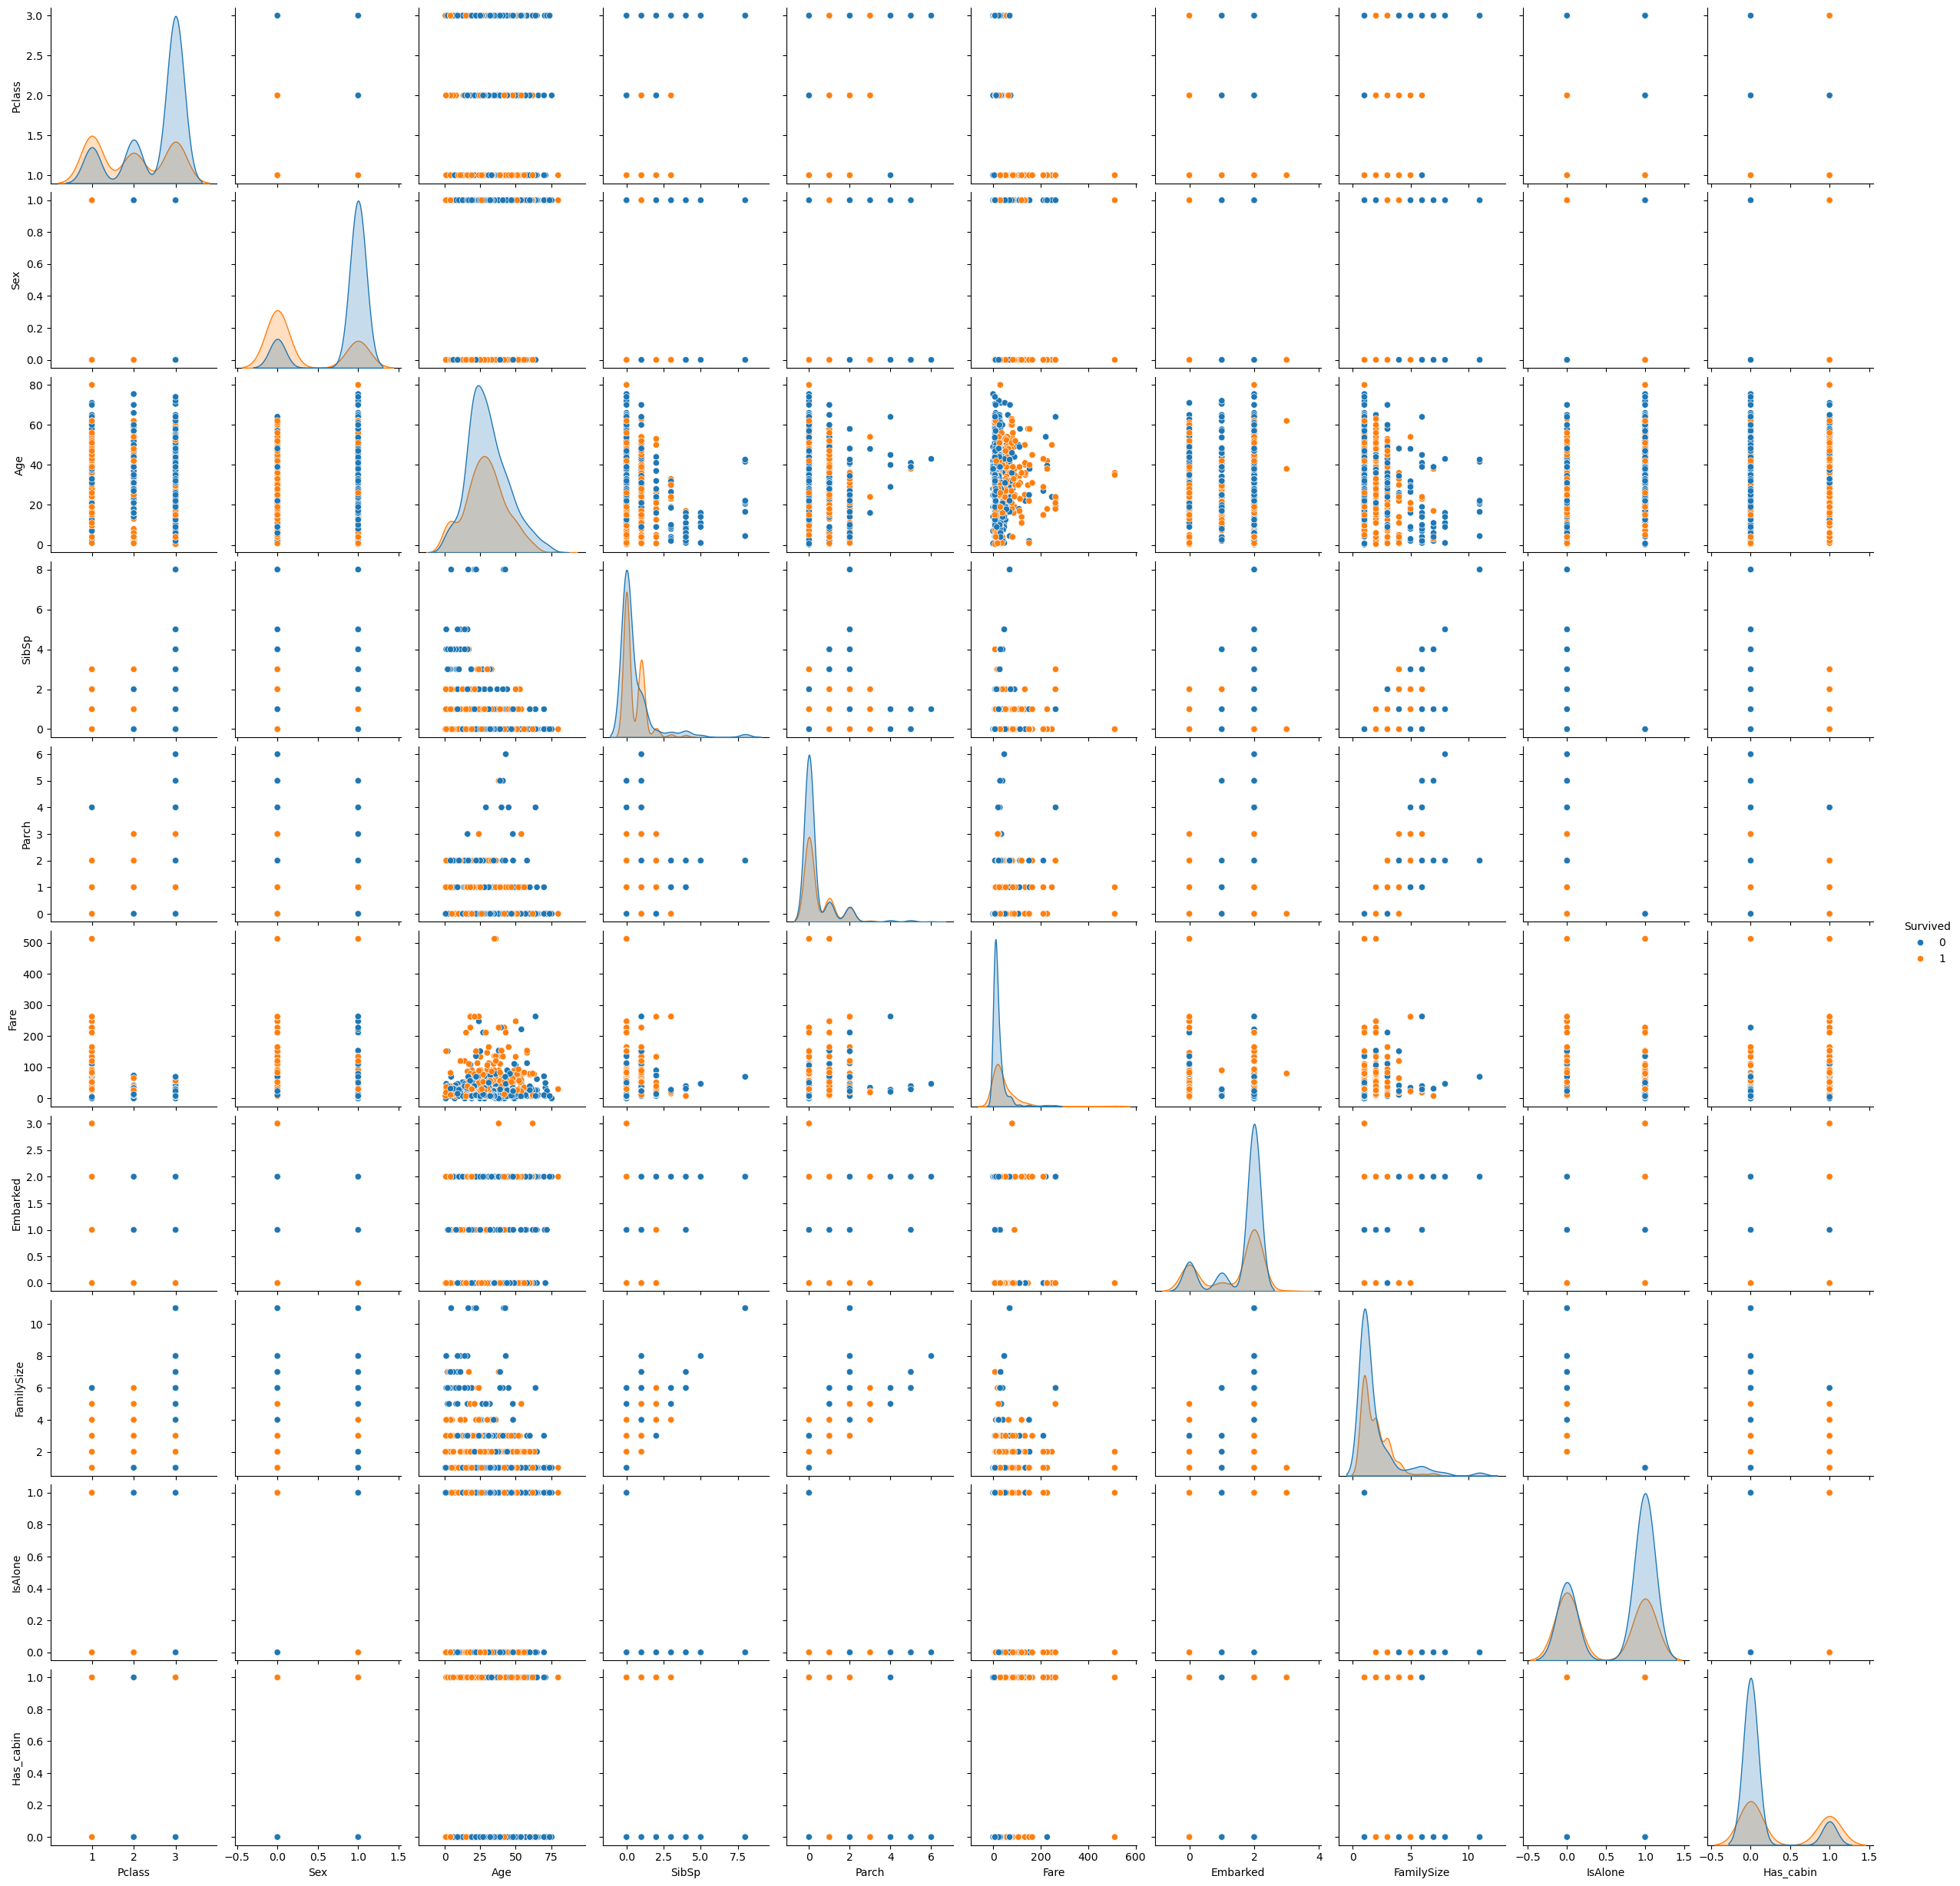

In [23]:
#Do a pairplot of all features

sns.pairplot(df,hue='Survived')

In [ ]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_validation = train_test_split(x,y,test_size=0.1,random_state=42)



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
165,3,1,9.000000,0,2,20.5250,2,3,False,False
541,3,0,9.000000,4,2,31.2750,2,7,False,False
625,1,1,61.000000,0,0,32.3208,2,1,True,True
388,3,1,57.815541,0,0,7.7292,1,1,True,False
76,3,1,39.629175,0,0,7.8958,2,1,True,False
...,...,...,...,...,...,...,...,...,...,...
106,3,0,21.000000,0,0,7.6500,2,1,True,False
270,1,1,15.685220,0,0,31.0000,2,1,True,False
860,3,1,41.000000,2,0,14.1083,2,3,False,False
435,1,0,14.000000,1,2,120.0000,2,4,False,True


In [105]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Create the model
model = DecisionTreeClassifier(criterion='entropy')
# Fitting the decision tree with default hyperparameters
model.fit(x_train,y_train)


# validation

from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_validation,y_pred)



0.7555555555555555

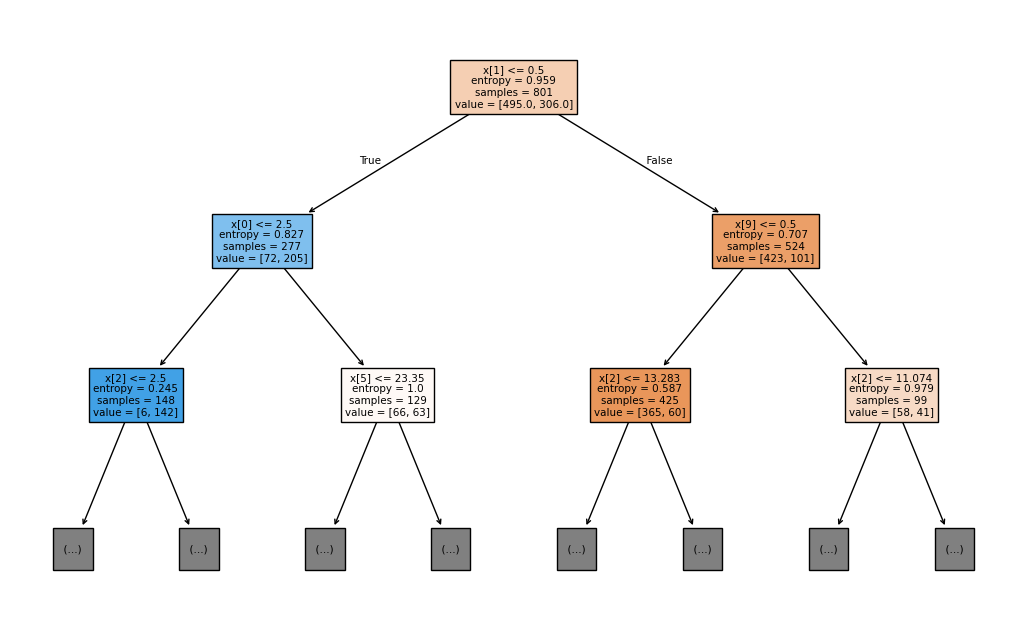

In [97]:
#Print the tree

# Importing required packages for visualization
from sklearn import tree
plt.figure(figsize=(13,8))
# Visualize the tree using better visualization
# tree.plot_tree(model, feature_names=x.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=10, precision=2,max_depth=2)
tree.plot_tree(model,max_depth=2,filled=True)

# Train the Decision Tree model
plt.show()


(90, 10)

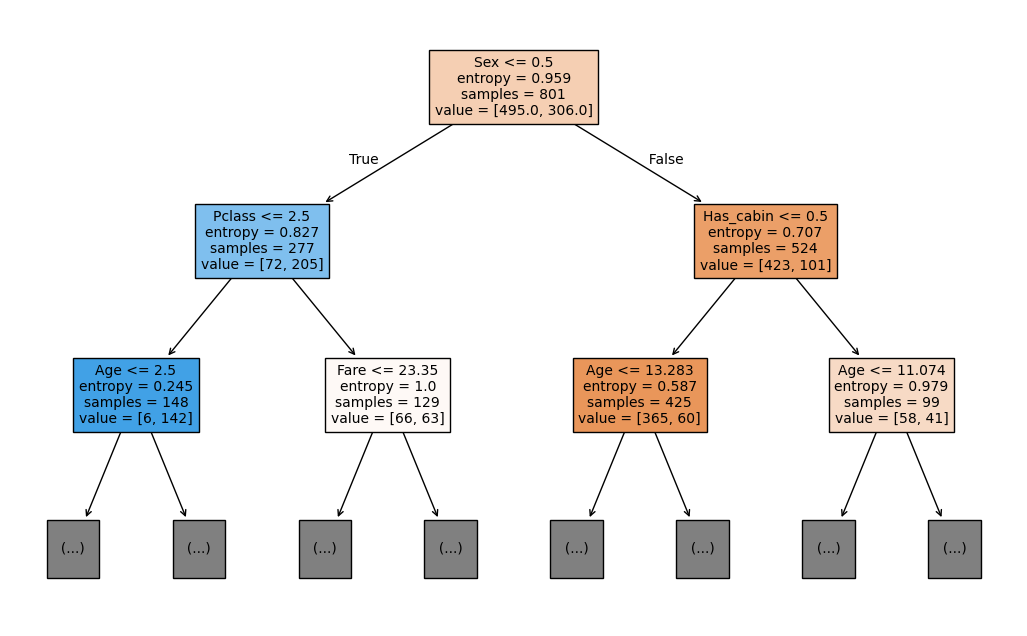

In [ ]:
# plotting tree with max_depth=3
plt.figure(figsize=(13,8))
tree.plot_tree(model,max_depth=2,filled=True,fontsize=10,feature_names=x.columns)
plt.show()

In [110]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score
display(confusion_matrix(y_validation,y_pred))
display(accuracy_score(y_validation,y_pred))
display(precision_score(y_validation,y_pred))
display(recall_score(y_validation,y_pred))
display(f1_score(y_validation,y_pred))

# Making predictions

# Printing classification report
print(classification_report(y_validation,y_pred))

array([[40, 14],
       [ 8, 28]], dtype=int64)

0.7555555555555555

0.6666666666666666

0.7777777777777778

0.717948717948718

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        54
           1       0.67      0.78      0.72        36

    accuracy                           0.76        90
   macro avg       0.75      0.76      0.75        90
weighted avg       0.77      0.76      0.76        90



In [ ]:
# Printing confusion matrix and accuracy
